```{note} Accumulation Distribution Index (ADI)

# Acting as leading indicator of price movements.

For more infor [click this link](https://school.stockcharts.com/doku.php?id=technical_indicators:true_strength_index)

Here for [stockcharts ADI](https://school.stockcharts.com/doku.php?id=technical_indicators:accumulation_distribution_line)

Here for [stockcharts](https://stockcharts.com/acp/?s=AMZN)

Here link for [Ta indicators](https://technical-analysis-library-in-python.readthedocs.io/en/latest/ta.html)

Here link for [Ta index page](https://technical-analysis-library-in-python.readthedocs.io/en/latest/index.html)

```

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle

import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_white"

from pathlib import Path
from tqdm.auto import tqdm


from sklearn.metrics import mean_absolute_error
from IPython.display import display, HTML
# %load_ext autoreload
# %autoreload 2


np.random.seed()
tqdm.pandas()

In [2]:
from pandarallel import pandarallel
pandarallel.initialize()

INFO: Pandarallel will run on 4 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.

https://nalepae.github.io/pandarallel/troubleshooting/


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import yfinance as yf
from datetime import date, datetime, timedelta

from ta import add_all_ta_features

In [5]:

def format_plot(fig, legends = None, xlabel="Time", ylabel="Value", figsize=(400,900), 
                font_size=15, title_font_size=20, text=None):
    if legends:
        names = cycle(legends)
        fig.for_each_trace(lambda t:  t.update(name = next(names)))
    fig.update_layout(
            autosize=False,
            width=figsize[1],
            height=figsize[0],
            title={
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'},
            titlefont={
                "size": 20
            },
            legend_title = None,
            legend=dict(
                font=dict(size=font_size),
                orientation="h",
                yanchor="bottom",
                y=0.98,
                xanchor="right",
                x=1,
            ),
            yaxis=dict(
                title_text=ylabel,
                titlefont=dict(size=font_size),
                tickfont=dict(size=font_size),
            ),
            xaxis=dict(
                title_text=xlabel,
                titlefont=dict(size=font_size),
                tickfont=dict(size=font_size),
            ),
            annotations = [dict(
                x=-0.1,
                y=-0.3,
                xref='paper',
                yref='paper',
                text = text,
                showarrow = False,
                font= {"size":15, "family":"Arial Black"}

            )]
        )
    return fig



In [6]:
riskyAsset = "AMZN"
company = "Amazon"
startdate = date.today() - timedelta(days=365)

df = yf.download(riskyAsset, start=startdate)

[*********************100%%**********************]  1 of 1 completed


In [7]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-10-14,114.099998,114.959999,106.599998,106.900002,106.900002,67737300
2022-10-17,110.110001,114.190002,110.089996,113.790001,113.790001,62782000
2022-10-18,119.059998,119.519997,114.790001,116.360001,116.360001,65607400
2022-10-19,114.709999,116.589996,113.220001,115.070000,115.070000,47198100
2022-10-20,113.830002,118.239998,113.510002,115.250000,115.250000,48795100


In [8]:
# Discard the previously calculated indicators and keep only the required columns:
df = df[["Open", "High", "Low", "Close", "Volume"]].copy()

In [9]:
# Calculate all the technical indicators available in the ta library:
df = add_all_ta_features(df, open="Open", high="High",
            low="Low", close="Close", volume="Volume")

In [10]:
df.head()

,Open,High,Low,Close,Volume,volume_adi,volume_obv,volume_cmf,volume_fi,volume_em,...,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr
Date,,,,,,,,,,,,,,,,,,,,,
2022-10-14,114.099998,114.959999,106.599998,106.900002,67737300,-6.287572e+07,67737300,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.096226,NaN,0.000000
2022-10-17,110.110001,114.190002,110.089996,113.790001,62782000,-1.234390e+07,130519300,NaN,NaN,8.881544,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.445275,6.246082,6.445275
2022-10-18,119.059998,119.519997,114.790001,116.360001,65607400,-3.439794e+07,196126700,NaN,NaN,36.155869,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.258546,2.233419,8.849391
2022-10-19,114.709999,116.589996,113.220001,115.070000,47198100,-2.977613e+07,148928600,NaN,NaN,-16.065242,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.108629,-1.114820,7.642655
2022-10-20,113.830002,118.239998,113.510002,115.250000,48795100,-4.267126e+07,197723700,NaN,NaN,9.402792,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.156427,0.156305,7.811037


```{note} ADI

Accumulation Distribution index measures the cumulative flow of money into and out of an asset. 

```

In [11]:
adi = df[["volume_adi"]].dropna()

In [12]:
def plotohlc(stock, name):
    """
    
    """
    
    
    fig , ax = plt.subplots(figsize=[9,5])

    # Create a new DataFrame called "up" that stores the stock_prices
    # when the closing stock price is greater than or equal to the opening stock price
    up = stock[stock.Close >= stock.Open]

    # Create a new DataFrame called "down" that stores the stock_prices
    # when the closing stock price is lesser than the opening stock price
    down = stock[stock.Close < stock.Open]
    
   

    # When the stock prices have decreased, then it
    # will be represented by red color candlestick
    col1 = 'red'

    # When the stock prices have increased, then it
    # will be represented by green color candlestick
    col2 = 'green'

    # Set the width of candlestick elements
    width = 3
    width2 = 0.9

    # Plot the up prices of the stock
    plt.bar(up.index, up.Close-up.Open, width, bottom=up.Open, color=col2,)
    plt.bar(up.index, up.High-up.Close, width2, bottom=up.Close, color=col2)
    plt.bar(up.index, up.Low-up.Open, width2, bottom=up.Open, color=col2)

    # Plot the down prices of the stock
    plt.bar(down.index, down.Close-down.Open, width, bottom=down.Open, color=col1)
    plt.bar(down.index, down.High-down.Open, width2, bottom=down.Open, color=col1)
    plt.bar(down.index, down.Low-down.Close, width2, bottom=down.Close, color=col1)

    # Rotate the x-axis tick labels at 45 degrees towards right
    plt.xticks(rotation=45, ha='right')

    # Display the candlestick chart of stock data for a week
    plt.title(f'ADI and Stock Prices for {name}')
    plt.xlabel('Date')
    plt.grid()
    plt.ylabel('Price (USD)')
    
    ax2 = ax.twinx()
    stock.volume_adi.plot(ax=ax2, color="magenta", label="ADI")
    
    sns.despine()
    plt.legend()

    plt.show()

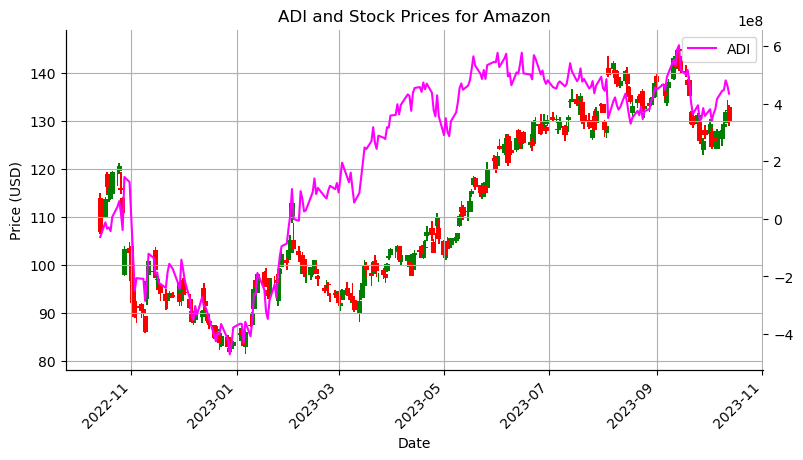

In [13]:
plotohlc(df, "Amazon")

In [351]:
dfa = df.loc["2023-09":,]
dfa.head()

,Open,High,Low,Close,Volume,volume_adi,volume_obv,volume_cmf,volume_fi,volume_em,...,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr,Date
Date,,,,,,,,,,,,,,,,,,,,,
2023-09-01,139.460007,139.960007,136.880005,138.119995,40948300,4.485674e+08,533421500,0.107348,3.187771e+07,11.470637,...,0.687298,0.004989,-8.358185,-8.821497,0.463311,134.128731,0.079705,0.079673,29.204858,2023-09-01
2023-09-05,137.729996,137.800003,135.820007,137.270004,40636700,4.674491e+08,492784800,0.066323,2.238935e+07,-7.844619,...,0.698305,0.044028,-8.451072,-8.747412,0.296340,134.238386,-0.615400,-0.617302,28.409731,2023-09-05
2023-09-06,136.320007,137.449997,134.610001,135.360001,41785500,4.477335e+08,450999300,0.029454,7.789375e+06,-5.301397,...,0.690774,-0.030123,-8.234158,-8.644761,0.410603,134.252327,-1.391421,-1.401192,26.623011,2023-09-06
2023-09-07,133.899994,138.029999,133.160004,137.850006,48498900,4.926474e+08,499498200,0.111397,2.392840e+07,-4.368008,...,0.699698,0.035694,-6.765454,-8.268900,1.503445,134.339125,1.839543,1.822828,28.952296,2023-09-07
2023-09-08,136.860001,138.850006,136.750000,138.229996,38348200,5.083516e+08,537846400,0.150897,2.259176e+07,12.074927,...,0.721251,0.086213,-7.360000,-8.087120,0.727120,134.904530,0.275654,0.275275,29.307758,2023-09-08


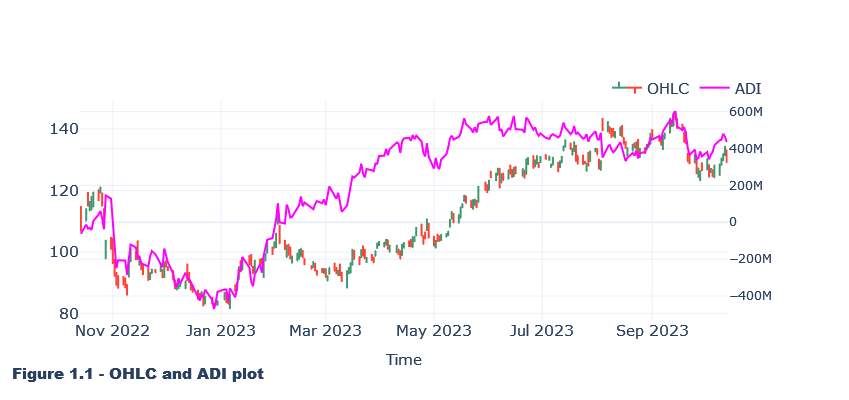

In [353]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
 

fig = make_subplots(specs=[[{"secondary_y": True}]])

n = 1

text = f"Figure 1.{n} - OHLC and ADI plot "

# fig = go.Figure(data=go.Ohlc(x=df.index,
#                     open=df['Open'],
#                     high=df['High'],
#                     low=df['Low'],
#                     close=df['Close']))

fig.add_trace(go.Ohlc(x=df.index,
                    open=df['Open'],
                    high=df['High'],
                    low=df['Low'],
                    close=df['Close'], name="OHLC"))

fig.add_trace(go.Scatter(x=df.index, y=df.volume_adi,
    fill=None, name='ADI',
    mode='lines',
    line_color='magenta'), secondary_y=True)
fig = format_plot(fig, ylabel=" ", text=text)
fig.update(layout_xaxis_rangeslider_visible=False)

fig.show()

```{important} ADI price confirmation

Money Flow Volume accumulates to form a line that either confirms or contradicts the underlying price trend. In this regard, the indicator is used to either reinforce the underlying trend or cast doubts on its sustainability. An uptrend in prices with a downtrend in the Accumulation Distribution Line suggests underlying selling pressure (distribution) that could foreshadow a bearish reversal on the price chart. A downtrend in prices with an uptrend in the Accumulation Distribution Line indicates underlying buying pressure (accumulation) that could foreshadow a bullish price reversal. 

Trend Comfirmation
> - Trend confirmation is a pretty straightforward concept. An uptrend in the Accumulation Distribution Line reinforces an uptrend on the price chart and vice versa.

ADI Divergence
> - A bullish divergence forms when price moves to new lows, but the Accumulation Distribution Line does not confirm these lows and moves higher. A rising Accumulation Distribution Line shows, well, accumulation. Based on the theory that volume precedes price, chartists should be on alert for a bullish reversal on the price chart. 

> - A bearish divergence forms when price moves to new highs, but the Accumulation Distribution Line does not confirm and moves lower. This shows distribution or underlying selling pressure that can foreshadow a bearish reversal on the price chart. 

It cannot be expected to always affirm price action or successfully predict price reversals with divergences. Sometimes there is a disconnect between prices and the indicator. Sometimes the Accumulation Distribution Line simply doesn't work.

{cite:t}`https://school.stockcharts.com/doku.php?id=technical_indicators:accumulation_distribution_line`

{ref}`[school.stockcharts.com]: https://school.stockcharts.com/doku.php?id=technical_indicators:accumulation_distribution_line`

```

In [17]:
df.head()

,Open,High,Low,Close,Volume,volume_adi,volume_obv,volume_cmf,volume_fi,volume_em,...,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr
Date,,,,,,,,,,,,,,,,,,,,,
2022-10-14,114.099998,114.959999,106.599998,106.900002,67737300,-6.287572e+07,67737300,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.096226,NaN,0.000000
2022-10-17,110.110001,114.190002,110.089996,113.790001,62782000,-1.234390e+07,130519300,NaN,NaN,8.881544,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.445275,6.246082,6.445275
2022-10-18,119.059998,119.519997,114.790001,116.360001,65607400,-3.439794e+07,196126700,NaN,NaN,36.155869,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.258546,2.233419,8.849391
2022-10-19,114.709999,116.589996,113.220001,115.070000,47198100,-2.977613e+07,148928600,NaN,NaN,-16.065242,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.108629,-1.114820,7.642655
2022-10-20,113.830002,118.239998,113.510002,115.250000,48795100,-4.267126e+07,197723700,NaN,NaN,9.402792,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.156427,0.156305,7.811037


In [87]:

def plotCloseVol(df, ticker):
    """
    
    """
    
    dff = df.copy()
    dff['color'] = ["green" if close_price > open_price else "red" for close_price, open_price in zip(dff.Close, dff.Open)]
    
  
    # plt.style.use('default')
    figure, axis = plt.subplots(2, 1, figsize=[16, 8])
    figure.suptitle(ticker)

    # Draw the price history
    axis[0].plot(dff.index, dff['Close'])
    axis[0].axes.get_xaxis().set_visible(False)  # Remove X labels
    axis[0].grid()

    # Draw the volume
    # axis[1].bar(dff.index, dff['Volume'], color=dff['color'],width=len(dff.index)/(0.5*len(dff.index)))
    axis[1].bar(dff.index, dff['Volume'], color=dff['color'], width=1)

    # Tweak chart to display better
    plt.xticks(rotation=45, ha='right')
    plt.subplots_adjust(bottom=0.2)
    plt.grid()
    sns.despine()
    plt.tight_layout()
    plt.show()
    
    
    
    

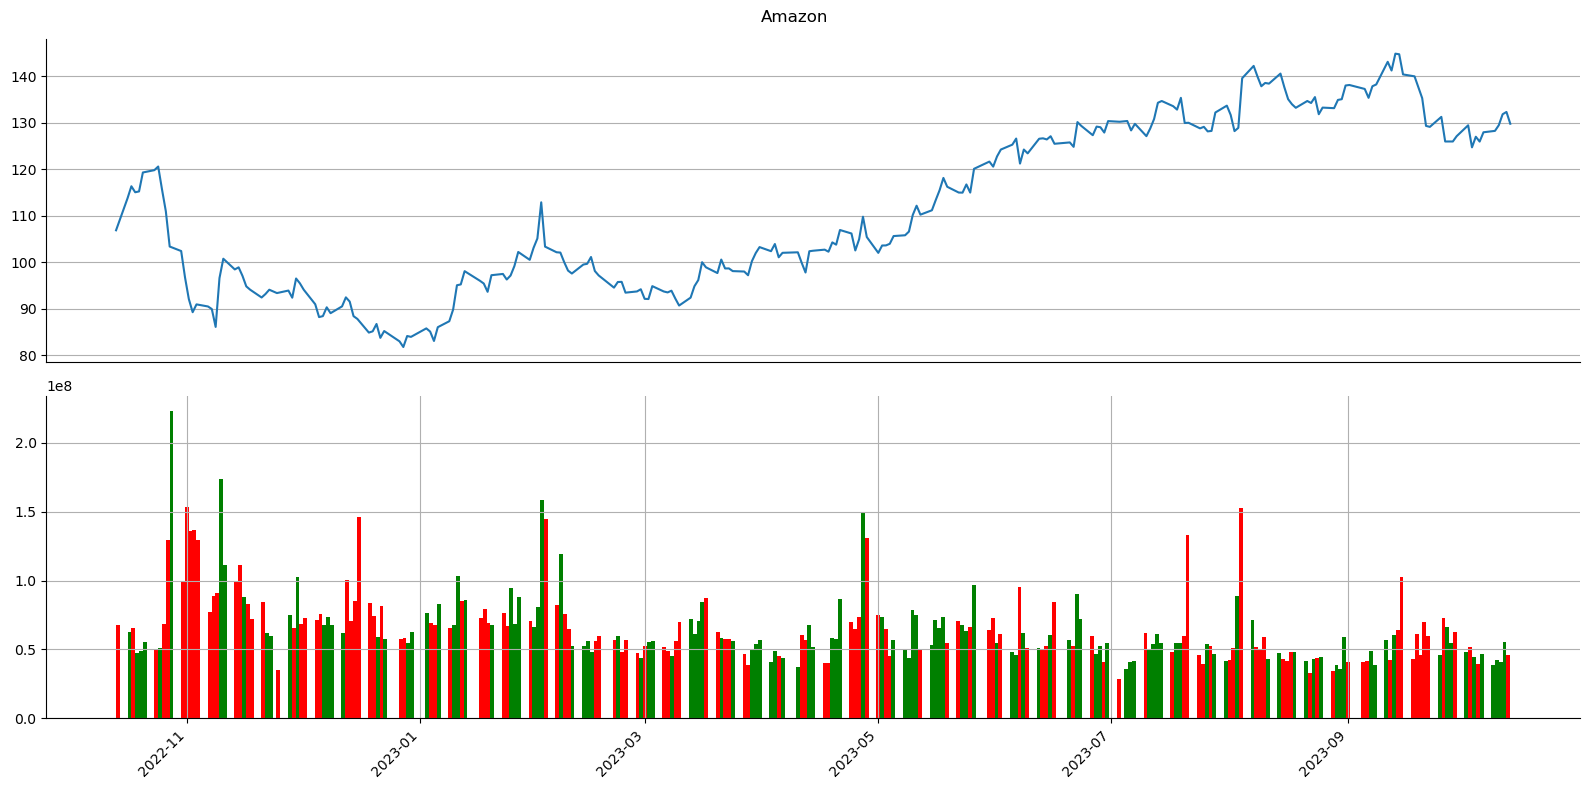

In [88]:
plotCloseVol(df, company)

In [342]:
ticker, company = "AMZN", "Amazon"
start, end = datetime(2022, 11, 1), datetime(2011, 1, 4)

In [343]:
data = yf.download(ticker, start=start)

[*********************100%%**********************]  1 of 1 completed


In [344]:
# Calculate all the technical indicators available in the ta library:
df2 = add_all_ta_features(data, open="Open", high="High",
            low="Low", close="Close", volume="Volume")

In [345]:
df2.head()

,Open,High,Low,Close,Adj Close,Volume,volume_adi,volume_obv,volume_cmf,volume_fi,...,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr
Date,,,,,,,,,,,,,,,,,,,,,
2022-11-01,103.989998,104.580002,96.059998,96.790001,96.790001,153370000,-1.270882e+08,153370000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-13.094533,NaN,0.000000
2022-11-02,97.320000,97.739998,92.010002,92.120003,92.120003,135761800,-2.576375e+08,17608200,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.824877,-4.945159,-4.824877
2022-11-03,92.470001,93.500000,89.019997,89.300003,89.300003,136683300,-3.772350e+08,-119075100,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.061224,-3.109058,-7.738400
2022-11-04,91.489998,92.440002,88.040001,90.980003,90.980003,129101300,-3.338099e+08,10026200,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.881299,1.863822,-6.002684
2022-11-07,91.949997,92.099998,89.040001,90.529999,90.529999,77495700,-3.358360e+08,-67469500,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.494619,-0.495847,-6.467612


In [346]:
df2 = df2.loc["2010-12-01":, ]

In [347]:
df2.tail()

,Open,High,Low,Close,Adj Close,Volume,volume_adi,volume_obv,volume_cmf,volume_fi,...,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr
Date,,,,,,,,,,,,,,,,,,,,,
2023-10-09,126.220001,128.789993,124.760002,128.259995,128.259995,38773700,3.168784e+08,881518900,-0.096628,-1.619380e+07,...,-1.922401,-1.668482,-0.253918,-4.463061,0.191406,-4.654467,128.639654,0.234445,0.234170,32.513683
2023-10-10,128.820007,130.740005,128.050003,129.479996,129.479996,42178600,3.195437e+08,923697500,-0.075993,-6.529266e+06,...,-1.731704,-1.681127,-0.050577,-5.355641,-0.918004,-4.437638,128.674783,0.951194,0.946699,33.774145
2023-10-11,129.740005,132.050003,129.610001,131.830002,131.830002,40741800,3.529386e+08,964439300,-0.098445,8.081126e+06,...,-1.417450,-1.628391,0.210941,-6.263167,-1.987036,-4.276131,128.899457,1.814957,1.798683,36.202088
2023-10-12,132.169998,134.479996,131.229996,132.330002,132.330002,55528600,3.349988e+08,1019967900,-0.128291,1.089301e+07,...,-1.124486,-1.527610,0.403124,-4.468084,-2.483246,-1.984838,129.164600,0.379276,0.378559,36.718670
2023-10-13,132.979996,133.309998,128.949997,129.789993,129.789993,45786600,3.068546e+08,974181300,-0.080381,-7.277187e+06,...,-1.038167,-1.429722,0.391554,-4.609146,-2.908426,-1.700720,129.178257,-1.919450,-1.938111,34.094423


In [348]:
def candlestick(t, o, h, l, c):
    plt.figure(figsize=(12,4))
    tt = list(range(len(t)))
    color = ["green" if close_price > open_price else "red" for close_price, open_price in zip(c, o)]
    plt.bar(x=tt, height=np.abs(o-c), bottom=np.min((o,c), axis=0), width=0.6, color=color, label="OHLC Price")
    plt.bar(x=tt, height=h-l, bottom=l, width=0.1, color=color)
    plt.legend()
    plt.xticks([])
    plt.grid(alpha=0.9)
    sns.despine()
    

    
def volplot(t, vol, o, c):
    """
    
    """
    plt.figure(figsize=(12,4))
    color = ["green" if close_price > open_price else "red" for close_price, open_price in zip(c, o)]
    tt = list(range(len(t)))

    plt.bar(x=tt, height=vol, width=0.9, color=color, label="Volume Bar")
    # Create names on the x-axis
    tg = [int(a) for a  in np.linspace(0, len(t)-1, int(0.2 * len(t)))]
    gg = [t[a].date() for a in tg]
    plt.xticks(tg, gg)
    plt.xticks(rotation=45, ha='right')
    plt.legend()
    plt.xticks([])
    plt.grid(alpha=0.9)
    sns.despine()
    
def plotadi_obv(adi, obv):
    """
    
    """
    
    fig, ax = plt.subplots(figsize=[10, 4])
    adi.plot(ax =ax, color="magenta", label ="ADI")
    plt.legend()

    ax2 = ax.twinx()
    obv.plot(ax =ax2, color="black", label="OBV")
    plt.xticks(rotation=45, ha='right')
    plt.subplots_adjust(bottom=0.2)
    plt.grid()
    sns.despine()
    plt.tight_layout()
    plt.legend()


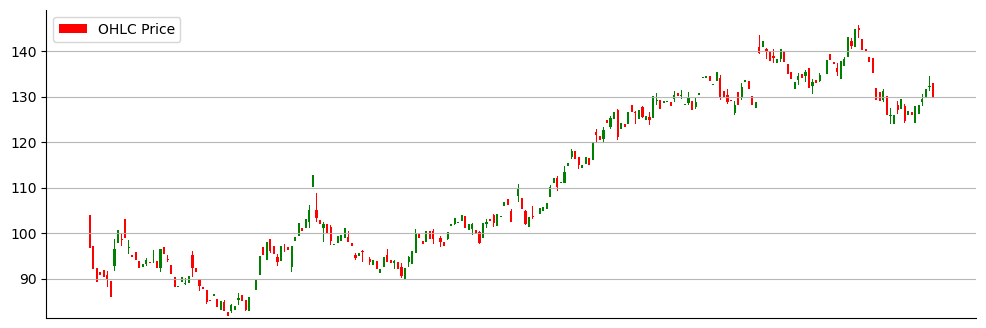

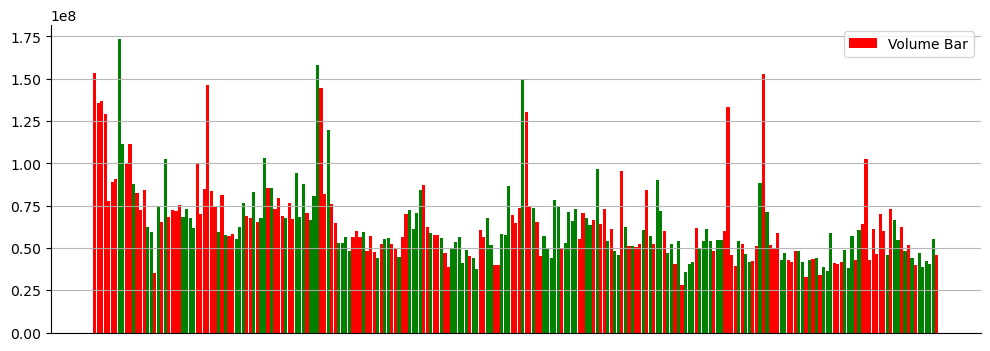

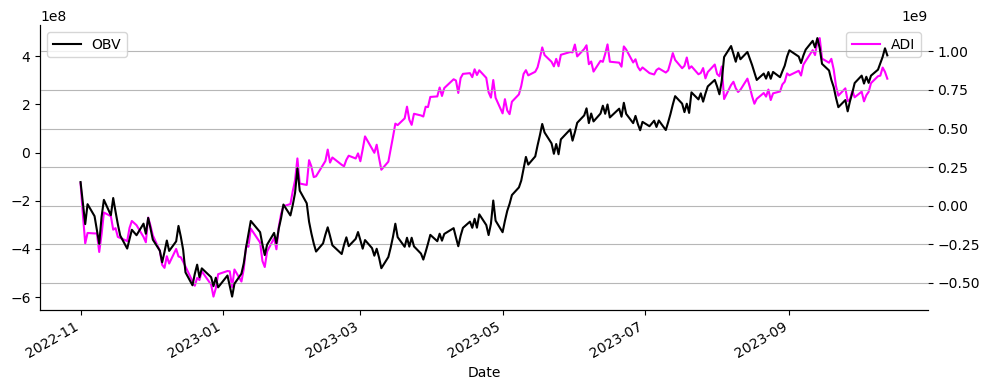

In [349]:

# fig, ax = plt.subplots(2)
candlestick(
    df2.index,
    df2.Open,
   df2.High,
   df2.Low,
   df2.Close
)
volplot(
    df2.index,
    df2.Volume,
    df2.Open,
   df2.Close
)

plotadi_obv(df2['volume_adi'], df2["volume_obv"])

plt.grid(alpha=0.9)
plt.show()

```{important} Important Note

A security could gap down and close significantly lower, but the Accumulation Distribution Line would rise if the close were above the midpoint of the high-low range. The chart above shows Clorox (CLX) with a big gap down and a close near the top of the day's high-low range. OBV moved sharply lower because the close was below the prior close. The Accumulation Distribution Line moved higher because the close was near the high of the day. 


The Accumulation Distribution Line can be used to gauge the general flow of volume. An uptrend indicates that buying pressure is prevailing on a regular basis, while a downtrend indicates that selling pressure is prevailing. Bullish and bearish divergences serve as alerts for a potential reversal on the price chart.

{cite:t}`https://school.stockcharts.com/doku.php?id=technical_indicators:accumulation_distribution_line`

{ref}`[school.stockcharts.com]: https://school.stockcharts.com/doku.php?id=technical_indicators:accumulation_distribution_line`

>  # Don't use alone, use with other indicators!

```